  #                                                    FASHION CLOTHING RECOMMENDER SYSTEM

Group members:

*  Onesphoro Kibunja
*  Bernadette Wanjiku Nganga
*  Caleb Ochieng

# 1. Introduction


     1.1 Background
     1.2 Business Understanding
     1.3 Data Understanding
     1.4 Significance of the Recommendation System

2. Data Exploration and Preprocessing


    2.1 Overview of the Dataset
    2.2 Data Cleaning
    2.2.1 Handling Missing Values
    2.2.2 Data Conversion
    2.2.3 Removing Duplicates
    2.3 Exploratory Data Analysis (EDA)
    2.3.1 Descriptive Statistics
    2.3.2 Data Visualization

3. Feature Engineering

    3.1 Transforming 'review_date'
    3.1.1  Encoding Categorical Variables
    3.1.2  One-Hot Encoding
    3.2 Label Encoding
  

4. Building the Recommendation System


    4.1 Choosing a Recommendation Algorithm
    4.1.1 Collaborative Filtering
    4.1.2 Content-Based Filtering
    4.1.3 Hybrid Models
    4.2 Model Training
    4.2.1 Splitting the Dataset into Training and Testing Sets
    4.2.2 Training the Chosen Algorithm(s)

5. Evaluation of the Recommendation System


    5.1 Metrics for Evaluation
    5.1.1 Accuracy
    5.1.2 Precision and Recall
    5.1.3 F1 Score
    5.2 Cross-Validation
    5.3 Fine-Tuning the Model

6. Results and Discussion



    6.1 Presentation of Results
    6.2 Comparison with Baseline Models
    6.3 Discussion on Model Performance

7. Challenges and Limitations


    7.1 Challenges Encountered
    7.2 Limitations of the Recommendation System
    7.3 Areas for Future Improvement

8. Conclusion



    8.1 Summary of Findings
    8.2 Implications of the Recommendation System

9. References

    9.1 Data Sources


# Introduction

Clothing, not only is a basic necesscity, it has evolved into somewhat an expression of one's character. In this day and age of the internet, we have a multitude and somewhat overwhelming number of choices for clothing. We want something stylish, something recent, something good to look at and most of all something comfortable to wear in different occasions. It is very hard to find something that ticks all these boxes due to the sheer number of clothing available.The difficulty in obtaining the right fit stems from a combination of individual body diversity, subjective preferences, and the variability in sizing across different brands and styles. No one has time to comb the internet for hours just to find this one piece of clothing and thus most people end up settling for second best or what is readily avialable.

This is where a fashion recommender system comes in. To make work easier for the consumer. 



# Business Understanding

The **problem statement** -as has been touched on above- is that in the dynamic and vast landscape of fashion, customers often find it challenging to discover styles that resonate with their preferences. This leads to a less satisfying shopping experience and potential missed opportunities for fashion retailers.

Our goal is to create a personalized recommender system using the Rent the Runway dataset, which will enhance the customer experience by providing tailored fashion recommendations. This not only improves user satisfaction but also increases the likelihood of repeat business for fashion retailers.

In the highly competitive fashion industry, understanding and meeting customer preferences is crucial for retaining and attracting customers. A recommender system can significantly boost user engagement, leading to increased customer satisfaction, loyalty, and ultimately, improved revenue for fashion retailers.

We want to harnes the insights from these features and thus our project aims to create a dynamic engine that evolves with user feedback, ensuring recommendations stay relevant and tailored to individual preferences. The ultimate goal is to elevate user satisfaction and engagement within the RentTheRunway platform, providing a curated and enjoyable fashion discovery journey

## Objectives
1. **Developing a recommender system Fashion retailers can give their customers to use to ease the process of choosing outfits to get.**
2. **Improve the shoping experience for customers by making it more personalized. The beter the experience the higher the chance of customer retention.**
3. **Check if there are any underlying trends in terms of customer choices and other features in the data.**
4. **Understand people's physical features so as to guide as to whaat kind of clothing to make.**


## Data Understanding

The dataset has 192,544 rows and 15 columns.
Here is a brief data understanding for each column in the provided dataset:

1. `fit`:

Description: Indicates the fit category of the clothing item.



**Insight**: Categorizes whether the clothing item fits well, providing information on user satisfaction with the fit.

2. `user_id`:

Description: Unique identifier for each user.




**Insight**: A reference to distinguish and associate each review with a specific user.

3. `bust size`:

Description: Specifies the bust size of the user.




**Insight**: Offers information on the user's body measurements, contributing to the understanding of fit preferences.

4. `item_id`:

Description: Unique identifier for each clothing item.



**Insight**: Allows tracking and referencing of individual clothing items in the dataset.

5. `weight`:

Description: Specifies the weight of the user.




**Insight**: Provides additional user body information that may influence the fit and preferences.

6. `rating`:

Description: User-provided rating for the rented clothing item.




**Insight**: Quantifies user satisfaction with the rented item, contributing to overall system performance evaluation.

7. `rented for`:

Description: Describes the occasion for which the clothing item was rented.





**Insight**: Gives context to user preferences based on different occasions.

8. `review_text`:

Description: Textual review provided by the user.



**Insight**: Qualitative feedback offering detailed insights into the user's experience with the rented item.

9. `body type`:

Description: Describes the body type of the user.



**Insight**: Additional information on the user's body shape, contributing to understanding fit preferences.

10. `review_summary`:

Description: Concise summary of the user's review.



**Insight**: Provides a quick overview of the user's sentiment or key points regarding the rented item.

11. `category`:

Description: Specifies the category of the clothing item (e.g., gown, sheath, dress).



**Insight**: Helps categorize and organize clothing items for analysis and recommendations.

12. `height`:

Description: Specifies the height of the user.



**Insight**: Additional information on the user's body proportions, contributing to understanding fit preferences.

13. `size`:

Description: Specifies the size of the clothing item.




**Insight**: Indicates the size of the rented item, which is crucial for fit evaluation.

14. `age`:

Description: Specifies the age of the user.



**Insight**: Information on the user's age may contribute to understanding style preferences and fit expectations.

15. `review_date`:

Description: Date when the review was submitted.



**Insight**: Temporal information that allows tracking reviews over time and analyzing trends in user feedback.

# 2. Data Exploration and Preprocessing

2.1 Overview of the Dataset

We start by opening the dataset and just have an overal view and check basic info  such as shape, column names, data type among others so as to give us a better understanding on how we will have to clean it.

In [1]:
# Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

In [2]:
#Checking the dataset

# Specify the path to your compressed JSON file
json_file_path = 'renttherunway_final_data.json.gz'

# Open the compressed JSON file using gzip and load it into a Pandas DataFrame
with gzip.open(json_file_path, 'rt') as f:
    df = pd.read_json(f, lines=True)

In [3]:
# Preview our dataframe
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [4]:
#Checking information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


We note that `weight` column is object data type. This is due to the presence of strings to show the units. We will have to change this column to int to make it easier to work with the numbers

In [5]:
#Checking shape of the dataset
df.shape

(192544, 15)

In [6]:
# Check on NaN values
df.isnull().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

The dataset has a number of missing values in different columns which we will clean up later on.

In [7]:
df.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

We also notice some of the column names have line spaces and others have underscores. We will rectify that so as to have uniformity on the column names.

In [8]:
df.describe()

,user_id,item_id,rating,size,age
count,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


The `age` and `size` column have a minimum value of **0**. This is not feasible in real life and hence we will need to change those values. Furthermore the max value for `age` is **117**. Although a possibilty this seems most unlikely to be the case for this dataset.

In [9]:
df['rating'].value_counts()

10.0    124537
8.0      53391
6.0      10697
4.0       2791
2.0       1046
Name: rating, dtype: int64

We also note that the `rating` column only has 5 unique inputs (even numbers only) and the data is not continous.

      2.2 Data cleaning 


We start by changing the column name structure for consistency

In [10]:
df.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [11]:
# Change linespace to underscore
df.rename(columns = {
   "bust size": "bust_size",
   "rented for": "rented_for",
   "body type" : "body_type"}, inplace=True)

# Confirm our changes
df.columns

Index(['fit', 'user_id', 'bust_size', 'item_id', 'weight', 'rating',
       'rented_for', 'review_text', 'body_type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')


*     2.2.1 Handling Missing Values

We then check the number of missing values in all the columns and deal with each in the best way possible.

In [12]:
# Check NaN values
df.isnull().sum()

fit                   0
user_id               0
bust_size         18411
item_id               0
weight            29982
rating               82
rented_for           10
review_text           0
body_type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

As seen above, our data has missing values on the following columns `bust_size`, `weight`,`rating`,`rented_for`,`body type`, `height` and `age`. 

We start with the `rating` and `rented_for` columns. The number of rows with missing data is extremely low. We will drop these rows as they will have no significant statistical impact on our analysis.

In [13]:
#dropping missing values for 'rating' and 'rented_for' columns
df.dropna(subset=['rating', 'rented_for'], inplace=True)


# df.reset_index(drop=True, inplace=True)

#checking missing values
df.isnull().sum()

fit                   0
user_id               0
bust_size         18394
item_id               0
weight            29957
rating                0
rented_for            0
review_text           0
body_type         14637
review_summary        0
category              0
height              677
size                  0
age                 959
review_date           0
dtype: int64

Now lets handle missing values for other columns.

In [14]:
df['bust_size'].value_counts()

34b    27271
34c    23131
34d    18023
36c    13508
32d    11193
       ...  
28h        1
28i        1
44h        1
42h        1
40i        1
Name: bust_size, Length: 106, dtype: int64

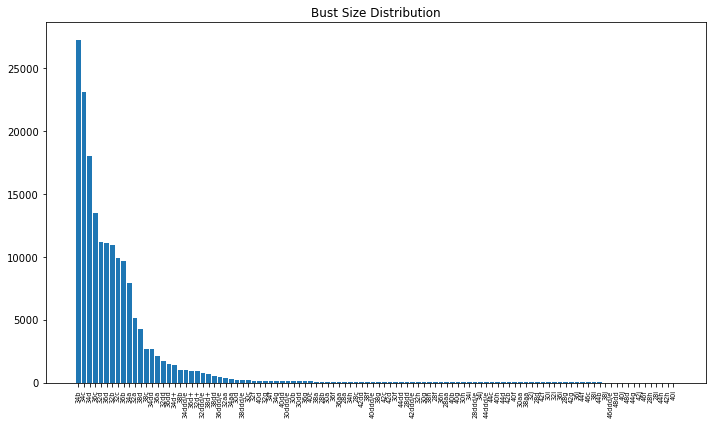

In [15]:
plt.figure(figsize=(10, 6)) 
plt.bar(df['bust_size'].value_counts().index, df['bust_size'].value_counts())
plt.title("Bust Size Distribution")
plt.xticks(rotation=90, fontsize=6.5)
plt.tight_layout();

The data seems to be categorical in nature with a number of outlliers. Thus we will not replace Nan vlaues with mean but rather with mode.

In [16]:
# Get the mode
mode_bust_size = df['bust_size'].mode()[0]
# df['bust_size'].replace('NaN', mode_bust_size, inplace=True)

# Replace mode NaN with Mode
df['bust_size'] = df['bust_size'].fillna(mode_bust_size)

# Confirm Changes
df.isna().sum()

fit                   0
user_id               0
bust_size             0
item_id               0
weight            29957
rating                0
rented_for            0
review_text           0
body_type         14637
review_summary        0
category              0
height              677
size                  0
age                 959
review_date           0
dtype: int64

We will do the same thing for `body_type` as it is also a categorical column.

In [17]:
df['body_type'].value_counts()

hourglass            55307
athletic             43650
pear                 22124
petite               22122
full bust            14998
straight & narrow    14737
apple                 4877
Name: body_type, dtype: int64

In [18]:
# Get the mode
mode_body_type = df['body_type'].mode()[0]
# df['bust_size'].replace('NaN', mode_bust_size, inplace=True)

# Replace mode NaN with Mode
df['body_type'] = df['body_type'].fillna(mode_body_type)

# Confirm Changes
df.isna().sum()

fit                   0
user_id               0
bust_size             0
item_id               0
weight            29957
rating                0
rented_for            0
review_text           0
body_type             0
review_summary        0
category              0
height              677
size                  0
age                 959
review_date           0
dtype: int64

We now move to the weight column.

In [19]:
#checking weight column
df['weight'].value_counts()

130lbs    14365
135lbs    13696
125lbs    12868
140lbs    12159
120lbs    10686
          ...  
251lbs        1
87lbs         1
264lbs        1
253lbs        1
263lbs        1
Name: weight, Length: 190, dtype: int64

We want to get rid of the SI unit of pounds and convert the data type from object to int to make it easier to work with the column

In [20]:
# Remove the strings and change the data type
df['weight'] = df['weight'].str.replace('lbs', '').astype(float)

# Confirm changes
df['weight'].value_counts()

130.0    14365
135.0    13696
125.0    12868
140.0    12159
120.0    10686
         ...  
87.0         1
271.0        1
269.0        1
58.0         1
243.0        1
Name: weight, Length: 190, dtype: int64

Check distribution of the data in the column and statistical figures

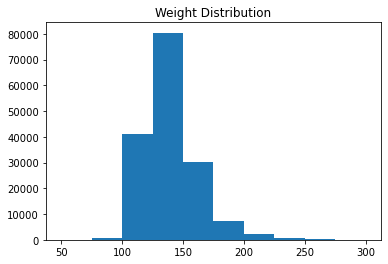

In [21]:
plt.hist(df['weight'])
plt.title('Weight Distribution');

In [22]:
df['weight'].describe()

count    162495.000000
mean        137.392621
std          21.899228
min          50.000000
25%         123.000000
50%         135.000000
75%         148.000000
max         300.000000
Name: weight, dtype: float64

As expected weight seems to have somewhat of a normal distribution and due to the fact the data is continous we will use the **mean** to fill in for the missing data.

In [23]:
# #First step, filling missing values with the mean

# mean_weight = df['weight'].str.extract('(\d+)').astype(float).mean()
# df['weight'].fillna(f"{mean_weight}lbs", inplace=True)

# # Step 2: Converting the 'weight' column to numeric
# df['weight'] = df['weight'].str.extract('(\d+)').astype(float)

# # Display the updated DataFrame
# print(df['weight'][:20])

In [24]:
# Fill in missing data with mean
df['weight'] = df['weight'].fillna(df['weight'].mean())

# Confirm changes
df.isnull().sum()

fit                 0
user_id             0
bust_size           0
item_id             0
weight              0
rating              0
rented_for          0
review_text         0
body_type           0
review_summary      0
category            0
height            677
size                0
age               959
review_date         0
dtype: int64

Now only `height` and `age` columns remain with missing values.

In [25]:
df['height'].value_counts()

5' 4"     27990
5' 6"     25665
5' 5"     24308
5' 7"     24009
5' 3"     20722
5' 2"     16758
5' 8"     16363
5' 9"     11365
5' 1"      7145
5' 10"     7041
5' 0"      4014
5' 11"     3114
6' 0"      1404
4' 11"     1013
6' 1"       364
4' 10"      212
6' 2"       124
4' 9"        60
6' 3"        31
4' 6"        20
6' 4"        18
4' 8"        17
4' 7"        16
6' 6"         2
Name: height, dtype: int64

For the `height` column we want to work with standard metric units and so we will conver the height from feet and inches to centimeters.

In [26]:
# First, define a function to convert the height format to inches
def convert_to_cm(height_str):
    if pd.isnull(height_str):
        return height_str

    if "'" in str(height_str):  # Check if the value is a string containing "'"
        feet, inches = map(int, str(height_str).replace('"', '').split("'"))
        total_inches = feet * 12 + inches
        cm_conversion_factor = 2.54
        height_cm = round(total_inches * cm_conversion_factor, 2)
        return height_cm
    else:
        return float(height_str)
    
# Apply the conversion function to the 'height' column
df['height'] = df['height'].apply(convert_to_cm)

In [27]:
# Confirm changes
df['height'].value_counts()

162.56    27990
167.64    25665
165.10    24308
170.18    24009
160.02    20722
157.48    16758
172.72    16363
175.26    11365
154.94     7145
177.80     7041
152.40     4014
180.34     3114
182.88     1404
149.86     1013
185.42      364
147.32      212
187.96      124
144.78       60
190.50       31
137.16       20
193.04       18
142.24       17
139.70       16
198.12        2
Name: height, dtype: int64

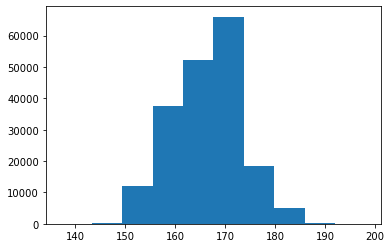

In [28]:
# Check heigh distribution
plt.hist(df['height']);

The data has a distribution close to normal and due to its continous nature we will replace the missing values with the **mean**

In [29]:
# Now, fill NaN values in the 'height' column with the mean or any other appropriate value
mean_height = df['height'].mean()
df['height'].fillna(mean_height, inplace=True)

# Confirm changes
df.isna().sum()

fit                 0
user_id             0
bust_size           0
item_id             0
weight              0
rating              0
rented_for          0
review_text         0
body_type           0
review_summary      0
category            0
height              0
size                0
age               959
review_date         0
dtype: int64

In [30]:
df['age'].median()

32.0

In [31]:
# Fill missing values with mean
df['age'] = df['age'].fillna(df['age'].median())

# Confirm changes
df.isna().sum()

fit               0
user_id           0
bust_size         0
item_id           0
weight            0
rating            0
rented_for        0
review_text       0
body_type         0
review_summary    0
category          0
height            0
size              0
age               0
review_date       0
dtype: int64

Now that all the missing values have been filled, we go ahead and deal with the feasibilty issues in the `age` and `size` columns.

In [32]:
df['age'].describe()

count    192452.000000
mean         33.860843
std           8.038657
min           0.000000
25%          29.000000
50%          32.000000
75%          37.000000
max         117.000000
Name: age, dtype: float64

We see that even despite feeling in the missing values we still have rows with 0 in ages. We need to fill these with also the mean age and drop all the rows above 100 years

In [33]:
# Drop rows with an age above 100
df = df[df['age'] <= 100]

# Fill rows with an age of '0' with the median
median_age = df['age'].median()
df['age'] = df['age'].replace(0, median_age)

# Confirm changes
df['age'].describe()

count    192387.000000
mean         33.837151
std           7.888465
min           1.000000
25%          29.000000
50%          32.000000
75%          37.000000
max         100.000000
Name: age, dtype: float64

We replace the 0 in `size` with the most common size.

In [34]:
df['size'] = df['size'].replace(0, df['size'].mode()[0])

In [35]:
# Confirm changes
df['size'].describe()

count    192387.000000
mean         12.267830
std           8.473083
min           1.000000
25%           8.000000
50%          12.000000
75%          16.000000
max          58.000000
Name: size, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192387 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192387 non-null  object 
 1   user_id         192387 non-null  int64  
 2   bust_size       192387 non-null  object 
 3   item_id         192387 non-null  int64  
 4   weight          192387 non-null  float64
 5   rating          192387 non-null  float64
 6   rented_for      192387 non-null  object 
 7   review_text     192387 non-null  object 
 8   body_type       192387 non-null  object 
 9   review_summary  192387 non-null  object 
 10  category        192387 non-null  object 
 11  height          192387 non-null  float64
 12  size            192387 non-null  int64  
 13  age             192387 non-null  float64
 14  review_date     192387 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 23.5+ MB


In [37]:
df['rating'].value_counts()

10.0    124488
8.0      53368
6.0      10696
4.0       2790
2.0       1045
Name: rating, dtype: int64

We need to convert the rating scale to 1-5. There are only even numbers (i.e. 2, 4, 6, 8, 10) in the column so condensing it to this seems reasonable.

In [38]:
rating_mapping = {2: 1, 4: 2, 6: 3, 8: 4, 10: 5}

# Replace the original 'Ratings' column with the mapped values
df['rating'] = df['rating'].map(rating_mapping)

# Confirm changes
df['rating'].value_counts()

5    124488
4     53368
3     10696
2      2790
1      1045
Name: rating, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192387 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192387 non-null  object 
 1   user_id         192387 non-null  int64  
 2   bust_size       192387 non-null  object 
 3   item_id         192387 non-null  int64  
 4   weight          192387 non-null  float64
 5   rating          192387 non-null  int64  
 6   rented_for      192387 non-null  object 
 7   review_text     192387 non-null  object 
 8   body_type       192387 non-null  object 
 9   review_summary  192387 non-null  object 
 10  category        192387 non-null  object 
 11  height          192387 non-null  float64
 12  size            192387 non-null  int64  
 13  age             192387 non-null  float64
 14  review_date     192387 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 23.5+ MB


In [40]:
#Checking the Summary Statistics for Numerical Features
df.describe()

,user_id,item_id,weight,rating,height,size,age
count,192387.000000,1.923870e+05,192387.000000,192387.000000,192387.000000,192387.000000,192387.000000
mean,499523.652570,1.046102e+06,137.396447,4.546175,165.890336,12.267830,33.837151
std,289050.522901,8.053137e+05,20.123466,0.715022,6.753413,8.473083,7.888465
min,9.000000,1.233730e+05,50.000000,1.000000,137.160000,1.000000,1.000000
25%,250747.000000,1.951240e+05,125.000000,4.000000,160.020000,8.000000,29.000000
50%,499419.000000,9.502240e+05,137.392621,5.000000,165.100000,12.000000,32.000000
75%,750998.000000,1.678888e+06,145.000000,5.000000,170.180000,16.000000,37.000000
max,999997.000000,2.966087e+06,300.000000,5.000000,198.120000,58.000000,100.000000


We see that the average weight is **137.4lbs**(62 kgs) while the average height is **165.9cm**. Most of the people in the dataset are aroune **33yrs** of age.

Skewness: 1.2361494460052949, Kurtosis: 2.3184959497566204


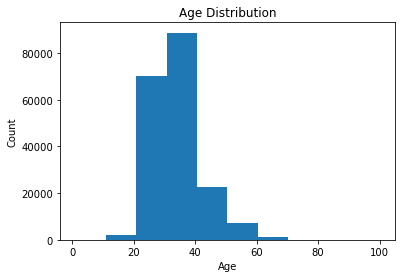

In [41]:
#Measuring the skewness and kurtosis of numerical features
skewness = df['age'].skew()
kurtosis = df['age'].kurt()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

plt.hist(df['age'])
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Count');

The data has a tail on the right side whicc is in line with its positive value of skewness (**1.23**). 

Its kurtosis is **2.32**. This shows that is is **platykurtic** (light-tailed).

In [42]:
#Computing the range (difference between maximum and minimum) for 'age','weight' and 'height' columns.
numerical_range = df[['age', 'weight', 'height']].max() - df[['age', 'weight', 'height']].min()
print(numerical_range)

age        99.00
weight    250.00
height     60.96
dtype: float64


# 2.3.2 Data Visualization

We check for correlation betweenthe different numerical features.

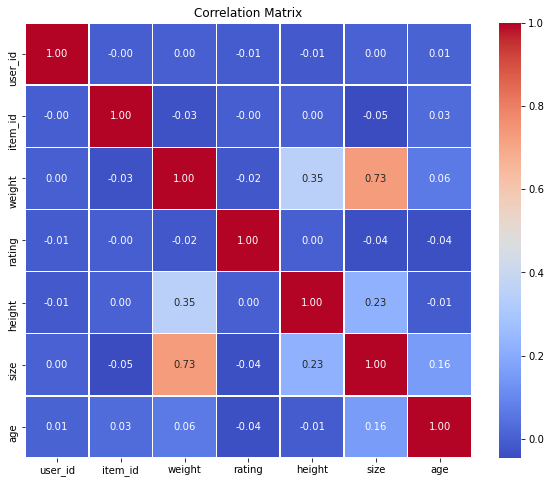

In [43]:
#Exploring relationships between columns using a correlation matrix.
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show();

Most features dont have a strong corelation with the only exception being weight and size. They have a strong positive correlation meaning that as weight increases so does size which does somewhat reflect what we already know.

In [44]:
df['body_type'].value_counts()

hourglass            69921
athletic             43643
pear                 22110
petite               22109
full bust            14994
straight & narrow    14735
apple                 4875
Name: body_type, dtype: int64

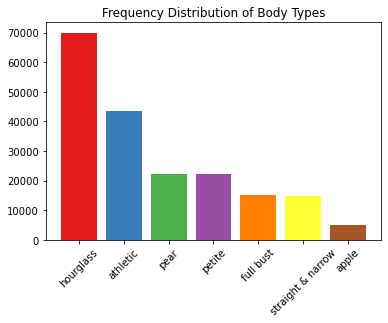

In [45]:
#Exploring the distribution of column 'body_type' using bar plot.

# sns.countplot(x='body_type', data=df)
unique_categories = df['body_type'].unique()
colors = plt.cm.Set1(range(len(unique_categories)))
plt.bar(df['body_type'].value_counts().index, df['body_type'].value_counts().values, color=colors)
plt.title('Frequency Distribution of Body Types')
plt.xticks(rotation=45)
plt.show();

We see that the most common body type as per our data is hour glass, with the least being apple.

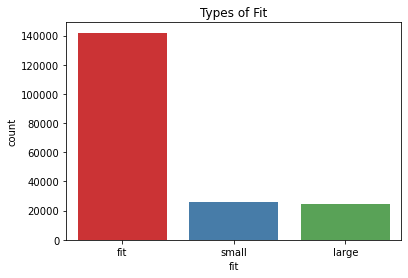

In [46]:
df['fit'].value_counts()

sns.countplot(x='fit', data=df, palette='Set1')
plt.title('Types of Fit');

The data shows that most people like clothes that fit onto their body type. Not too large or too small. 

In [47]:
b_s_vc = df['bust_size'].value_counts()
b_s_vc.head(30)

34b        45652
34c        23127
34d        18023
36c        13507
32d        11173
36d        11113
32b        10899
32c         9937
36b         9672
34a         7888
32a         5083
38d         4259
38c         2667
34dd        2665
36a         2086
32dd        1714
36dd        1468
34d+        1415
38b         1031
34ddd/e     1030
36d+         945
32d+         926
32ddd/e      726
38d+         660
38dd         519
36ddd/e      444
32aa         331
34aa         279
30d          195
38ddd/e      190
Name: bust_size, dtype: int64

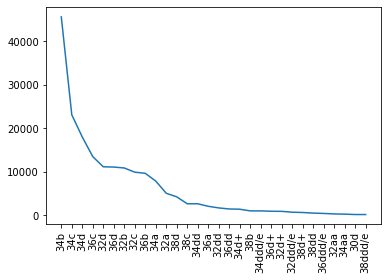

In [48]:
plt.plot(b_s_vc.head(30))
plt.xticks(rotation=90);

The graph shows the 30 most common bra-sizes among women in the dataset with 34B as the most common. This data is still too general and we would want to look at the bra sizes at different ages.

In [49]:
filtered_df = df[(df['age'] >= 18) & (df['age'] <= 40)]

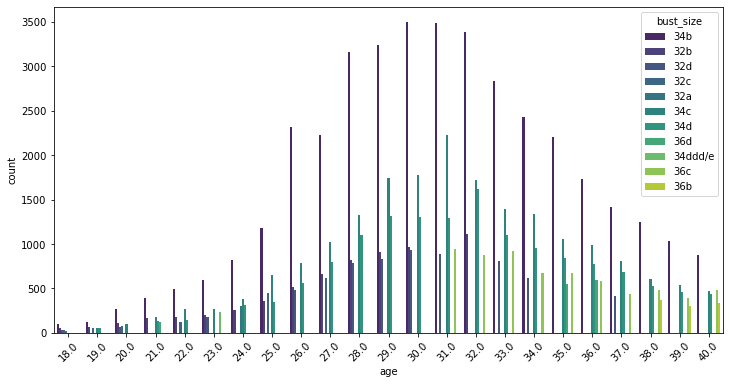

In [50]:
# Group by age and bust size, get counts, and select the top 5 for each age
top_bust_sizes = (
    filtered_df.groupby(['age', 'bust_size'])
               .size()
               .reset_index(name='count')
               .sort_values(['age', 'count'], ascending=[True, False])
               .groupby('age')
               .head(5)
)

# Create a countplot with hue
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', hue='bust_size', data=top_bust_sizes, palette='viridis')
plt.xticks(rotation=45)
plt.show();

Here we see the most common bra-sizes in women between 18 and 40. Once again it seems that 34b is the most common in every age group between those years.

Next we want to compare the rating of clothes against the reasons rented for. This will help us identify if there are clothes that are favoured more for certain events

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192387 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192387 non-null  object 
 1   user_id         192387 non-null  int64  
 2   bust_size       192387 non-null  object 
 3   item_id         192387 non-null  int64  
 4   weight          192387 non-null  float64
 5   rating          192387 non-null  int64  
 6   rented_for      192387 non-null  object 
 7   review_text     192387 non-null  object 
 8   body_type       192387 non-null  object 
 9   review_summary  192387 non-null  object 
 10  category        192387 non-null  object 
 11  height          192387 non-null  float64
 12  size            192387 non-null  int64  
 13  age             192387 non-null  float64
 14  review_date     192387 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 28.5+ MB


In [52]:
df['rented_for'].value_counts()

wedding            57759
formal affair      40345
party              35593
everyday           16819
other              15374
work               15036
date                7387
vacation            4073
party: cocktail        1
Name: rented_for, dtype: int64

We merge 'party:cocktail' with 'party'.

In [53]:
mapping_dict = {'party: cocktail': 'party'}

# Map the values using the dictionary
df['rented_for'] = df['rented_for'].map(mapping_dict).fillna(
                   df['rented_for'])

# Confirm changes
df['rented_for'].value_counts()

wedding          57759
formal affair    40345
party            35594
everyday         16819
other            15374
work             15036
date              7387
vacation          4073
Name: rented_for, dtype: int64

In [54]:
df['rating'].value_counts()

5    124488
4     53368
3     10696
2      2790
1      1045
Name: rating, dtype: int64

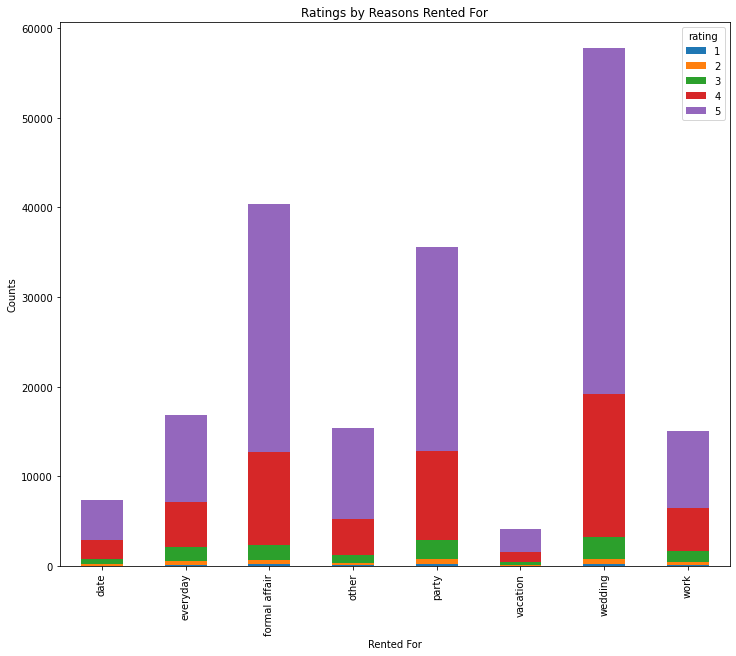

In [55]:
# Combine the two columns and count the occurrences
grouped_data = df.groupby(['rented_for', 'rating']).size().unstack()

# Plot a stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 10))
plt.title('Ratings by Reasons Rented For')
plt.xlabel('Rented For')
plt.ylabel('Counts')
plt.show();

We see that most of the clothing gets a high rating from the users. We also note that the highest use of the clothing is for wedding occasions.

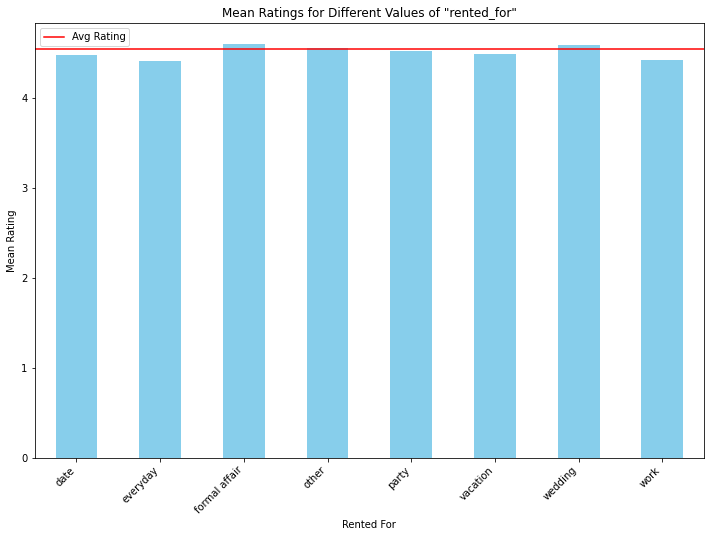

In [56]:
# Group by 'rented_for' and calculate the mean rating for each group
mean_ratings = df.groupby('rented_for')['rating'].mean()

# Plot the mean ratings
plt.figure(figsize=(12, 8))
mean_ratings.plot(kind='bar', color='skyblue')
plt.title('Mean Ratings for Different Values of "rented_for"')
plt.xlabel('Rented For')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45, ha='right')

# plot average rating
plt.axhline(y=df['rating'].mean(), color='red')
# dummy_line = Line2D([0], [0], color='red', linestyle='-')
plt.legend(loc='upper left', labels=['Avg Rating'])
plt.show()

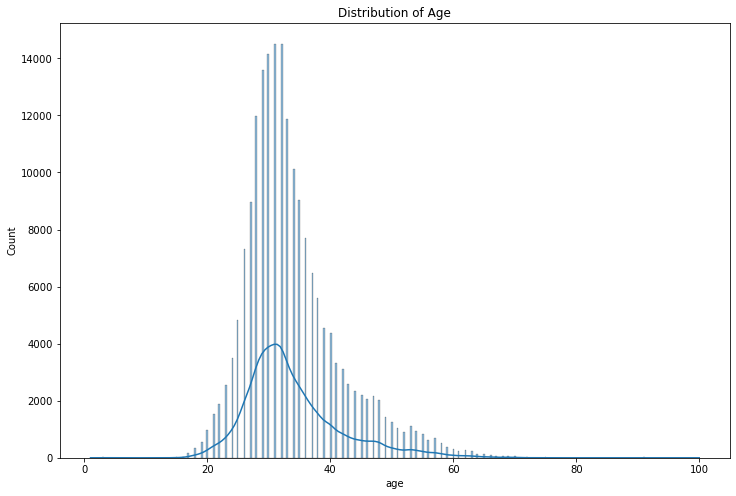

In [57]:
#Visualizing the distribution of 'age' using histograms or kernel density plots.

plt.figure(figsize=(12,8))
sns.histplot(df['age'], kde=True)

plt.title('Distribution of Age')
plt.show()

As expected this seems like a normal distribution.The histogram shows that majoority are between the ages of 20 - 40 years old.

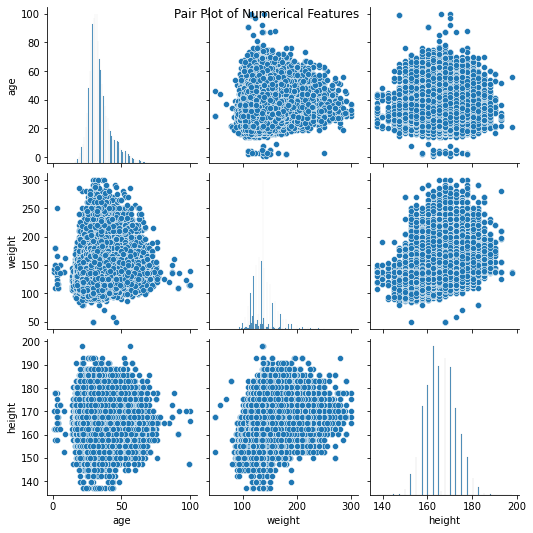

In [58]:
# Visualizing relationships between 'Age',' weight' and 'height' columns
sns.pairplot(df[['age', 'weight', 'height']])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

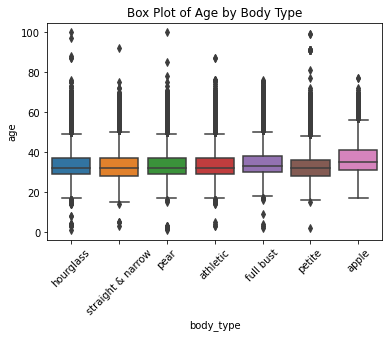

In [59]:
#Checking for outliers and comparing distributions using box plots.


sns.boxplot(x='body_type', y='age', data=df)
plt.title('Box Plot of Age by Body Type')
plt.xticks(rotation=45)
plt.show();

There are outliers especially at age 120 years for the columns weight, full bust and apple body_type.

# 3. Feature Engineering

In [60]:
df.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137.0,5,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,172.72,14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132.0,5,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,167.64,12,36.0,"June 18, 2013"
3,fit,909926,34c,126335,135.0,4,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,165.10,8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145.0,5,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,175.26,12,27.0,"September 26, 2016"
5,fit,734848,32b,364092,138.0,4,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,172.72,8,45.0,"April 30, 2016"


In [61]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ONES\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Create an intance of the RegexpTokenizer with the variable name `tokenizer`
# The regex pattern should select all words with three or more characters
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")

# Create a list of stopwords in English
stopwords_list = set(stopwords.words('english'))

# Create an instance of nltk's PorterStemmer with the variable name `stemmer`
stemmer = PorterStemmer()

In [63]:
def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Standardize case (lowercase the text)
    # YOUR CODE HERE
    text = text.lower()
    
    # Tokenize text using `tokenizer`
    # YOUR CODE HERE
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords using `stopwords_list`
    # YOUR CODE HERE
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Stem the tokenized text using `stemmer`
    # YOUR CODE HERE
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Return the preprocessed text
    # YOUR CODE HERE
    return tokens
    
preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)

['exampl', 'sentenc', 'preprocess']

In [64]:
text_data = df.review_text.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))
text_data

0         [ador, romper, belt, zipper, littl, hard, navi...
1         [rent, dress, photo, shoot, theme, hollywood, ...
3         [rent, compani, black, tie, award, banquet, li...
4         [alway, petit, upper, bodi, extrem, athlet, ty...
5         [actual, wear, fit, perfectli, fabric, littl, ...
                                ...                        
192539                                   [fit, like, glove]
192540    [pattern, contrast, dress, realli, stun, usual...
192541    [like, dvf, wrap, fit, fantast, albeit, collar...
192542    [dress, perfect, look, incred, photo, love, we...
192543    [dress, wonder, origin, plan, wear, bcbg, maxa...
Name: review_text, Length: 192387, dtype: object

In [65]:
df['processed_review'] = text_data
df.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,processed_review
0,fit,420272,34d,2260466,137.0,5,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,172.72,14,28.0,"April 20, 2016","[ador, romper, belt, zipper, littl, hard, navi..."
1,fit,273551,34b,153475,132.0,5,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,167.64,12,36.0,"June 18, 2013","[rent, dress, photo, shoot, theme, hollywood, ..."
3,fit,909926,34c,126335,135.0,4,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,165.10,8,34.0,"February 12, 2014","[rent, compani, black, tie, award, banquet, li..."
4,fit,151944,34b,616682,145.0,5,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,175.26,12,27.0,"September 26, 2016","[alway, petit, upper, bodi, extrem, athlet, ty..."
5,fit,734848,32b,364092,138.0,4,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,172.72,8,45.0,"April 30, 2016","[actual, wear, fit, perfectli, fabric, littl, ..."


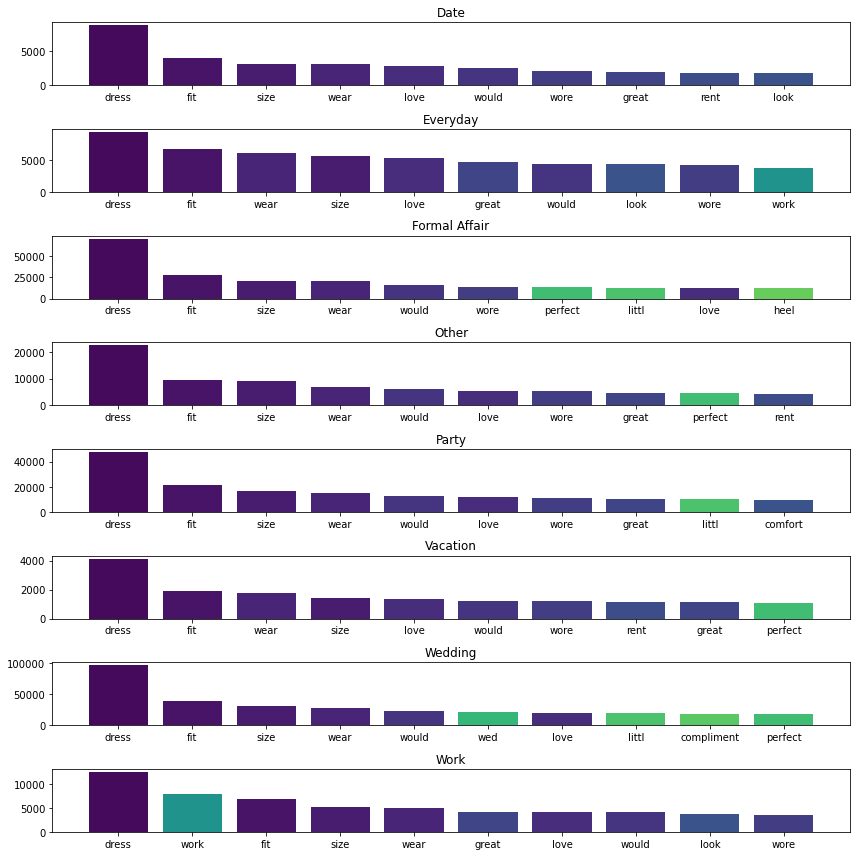

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes
fig, axes = plt.subplots(nrows=8, figsize=(12, 12))

# Empty dict to hold words that have already been plotted and their colors
plotted_words_and_colors = {}
# Establish color palette to pull from
color_palette = sns.color_palette('viridis', n_colors=38)  # Using 'viridis' colormap for better color variety

# Creating a plot for each unique genre
data_by_rent = [y for _, y in df.groupby('rented_for', as_index=False)]
for idx, rent_df in enumerate(data_by_rent):
    # Find top 10 words in this genre
    all_words_in_rent = rent_df.processed_review.explode()
    top_10 = all_words_in_rent.value_counts()[:10]
    
    # Select appropriate colors, reusing colors if words repeat
    colors = [plotted_words_and_colors.get(word, color_palette.pop(0) if color_palette else None) for word in top_10.index]
    plotted_words_and_colors.update(zip(top_10.index, [color for color in colors if color is not None]))
    
    # Select axes, plot data, set title
    ax = axes[idx]
    ax.bar(top_10.index, top_10.values, color=colors)
    ax.set_title(rent_df.iloc[0].rented_for.title())

    # Reset color_palette if it's empty
    if not color_palette:
        color_palette = sns.color_palette('viridis', n_colors=38)

fig.tight_layout()
plt.show()

In [67]:
df

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,processed_review
0,fit,420272,34d,2260466,137.0,5,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,172.72,14,28.0,"April 20, 2016","[ador, romper, belt, zipper, littl, hard, navi..."
1,fit,273551,34b,153475,132.0,5,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,167.64,12,36.0,"June 18, 2013","[rent, dress, photo, shoot, theme, hollywood, ..."
3,fit,909926,34c,126335,135.0,4,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,165.10,8,34.0,"February 12, 2014","[rent, compani, black, tie, award, banquet, li..."
4,fit,151944,34b,616682,145.0,5,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,175.26,12,27.0,"September 26, 2016","[alway, petit, upper, bodi, extrem, athlet, ty..."
5,fit,734848,32b,364092,138.0,4,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,172.72,8,45.0,"April 30, 2016","[actual, wear, fit, perfectli, fabric, littl, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140.0,5,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,175.26,8,42.0,"May 18, 2016","[fit, like, glove]"
192540,fit,118398,32c,682043,100.0,5,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,154.94,4,29.0,"September 30, 2016","[pattern, contrast, dress, realli, stun, usual..."
192541,fit,47002,36a,683251,135.0,3,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,172.72,8,31.0,"March 4, 2016","[like, dvf, wrap, fit, fantast, albeit, collar..."
192542,fit,961120,36c,126335,165.0,5,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,167.64,16,31.0,"November 25, 2015","[dress, perfect, look, incred, photo, love, we..."


# 4. Building the Recommendation System

In [68]:
# !pip install textblob

In [69]:
from textblob import TextBlob  # For sentiment analysis

# Calculate sentiment scores for review summaries
df['sentiment_score'] = df['review_summary'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Combine rating and sentiment to create hybrid_rating
df['hybrid_rating'] = df['rating'] + df['sentiment_score']

# Display the modified DataFrame
df[['rating', 'review_summary', 'sentiment_score', 'hybrid_rating']].head(10)

,rating,review_summary,sentiment_score,hybrid_rating
0,5,So many compliments!,0.625000,5.625000
1,5,I felt so glamourous!!!,0.000000,5.000000
3,4,Dress arrived on time and in perfect condition.,1.000000,5.000000
4,5,Was in love with this dress !!!,0.976562,5.976562
5,4,Traditional with a touch a sass,0.000000,4.000000
6,5,LITERALLY THE CUTEST DRESS EVER,0.000000,5.000000
7,5,"Great dress, beautifully made. I received lot...",0.900000,5.900000
8,5,Great for black tie event!,0.295833,5.295833
9,5,This dress was everything! It was perfect for ...,1.000000,6.000000
10,4,It was fun to wear a dress I wouldn't normally...,0.243750,4.243750


In [70]:
df.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,processed_review,sentiment_score,hybrid_rating
0,fit,420272,34d,2260466,137.0,5,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,172.72,14,28.0,"April 20, 2016","[ador, romper, belt, zipper, littl, hard, navi...",0.625000,5.625000
1,fit,273551,34b,153475,132.0,5,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,167.64,12,36.0,"June 18, 2013","[rent, dress, photo, shoot, theme, hollywood, ...",0.000000,5.000000
3,fit,909926,34c,126335,135.0,4,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,165.10,8,34.0,"February 12, 2014","[rent, compani, black, tie, award, banquet, li...",1.000000,5.000000
4,fit,151944,34b,616682,145.0,5,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,175.26,12,27.0,"September 26, 2016","[alway, petit, upper, bodi, extrem, athlet, ty...",0.976562,5.976562
5,fit,734848,32b,364092,138.0,4,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,172.72,8,45.0,"April 30, 2016","[actual, wear, fit, perfectli, fabric, littl, ...",0.000000,4.000000


In [71]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Assuming df3 is your DataFrame with the hybrid_rating column
reader = Reader(rating_scale=(df['hybrid_rating'].min(), df['hybrid_rating'].max()))
data = Dataset.load_from_df(df[['user_id', 'item_id', 'hybrid_rating']], reader)

# Split the dataset
trainset, testset = train_test_split(data, test_size=0.2)

# Use SVD as an example collaborative filtering algorithm
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

RMSE: 0.8394
Root Mean Squared Error (RMSE): 0.8393871484202438


In [72]:
# Making a prediction
user_328254_prediction = model.predict("328254", "1505652", "8.15" )
user_328254_prediction

Prediction(uid='328254', iid='1505652', r_ui='8.15', est=4.999852058724677, details={'was_impossible': False})

In [73]:
df[df['user_id']==328254]

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,processed_review,sentiment_score,hybrid_rating
4045,large,328254,32b,1453647,120.0,5,other,"Loved this dress! Very comfortable, works with...",straight & narrow,Comfort - many compliments.,dress,162.56,4,32.0,"August 28, 2017","[love, dress, comfort, work, strapless, bra, s...",0.50,5.50
192494,fit,328254,32b,1505652,120.0,4,other,Fit was great - as described.,straight & narrow,Rented this for the Christening of our daughte...,maxi,162.56,4,32.0,"August 21, 2017","[fit, great, describ]",0.15,4.15


In [74]:
from surprise.model_selection import cross_validate
from surprise import SVD

# Define parameter combinations to try
param_combinations = {'n_epochs': [5, 10, 15], 'lr_all': [0.002, 0.005, 0.01], 'reg_all': [0.02, 0.1, 0.4]}

# Load the dataset
data = Dataset.load_from_df(df[['user_id', 'item_id', 'hybrid_rating']], reader)

# Iterate over parameter combinations
for n_epochs in param_combinations['n_epochs']:
    for lr_all in param_combinations['lr_all']:
        for reg_all in param_combinations['reg_all']:
            # Create SVD model with current parameters
            svd_model = SVD(n_epochs=n_epochs, lr_all=lr_all, reg_all=reg_all)

            # Cross-validate the model
            results = cross_validate(svd_model, data, measures=['RMSE'], cv=3, verbose=False)

            # Print results
            print(f"Parameters: {{'n_epochs': {n_epochs}, 'lr_all': {lr_all}, 'reg_all': {reg_all}}}")
            print(f"Mean RMSE across folds: {results['test_rmse'].mean()}\n")


Parameters: {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.02}
Mean RMSE across folds: 0.8506440917593938

Parameters: {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.1}
Mean RMSE across folds: 0.8500482228326306

Parameters: {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.4}
Mean RMSE across folds: 0.8501830340467048

Parameters: {'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.02}
Mean RMSE across folds: 0.844796458196133

Parameters: {'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.1}
Mean RMSE across folds: 0.8445602455893338

Parameters: {'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.4}
Mean RMSE across folds: 0.8442932220125706

Parameters: {'n_epochs': 5, 'lr_all': 0.01, 'reg_all': 0.02}
Mean RMSE across folds: 0.8427620118345457

Parameters: {'n_epochs': 5, 'lr_all': 0.01, 'reg_all': 0.1}
Mean RMSE across folds: 0.8412389444871134

Parameters: {'n_epochs': 5, 'lr_all': 0.01, 'reg_all': 0.4}
Mean RMSE across folds: 0.8405560060471764

Parameters: {'n_epochs': 10, 'lr_all': 0.002, 'reg_all':

Best parameters for our model are:

Parameters: {'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.4}
Mean RMSE across folds: 0.8383306560027012

Parameters: {'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}
Mean RMSE across folds: 0.8383746264083918

In [75]:
# Create the final SVD model with optimal parameters
final_svd_model = SVD(n_epochs=10, lr_all=0.01, reg_all=0.4)

# Load the dataset
data = Dataset.load_from_df(df[['user_id', 'item_id', 'hybrid_rating']], reader)

# Build the full training set
trainset = data.build_full_trainset()

# Train the final model on the entire dataset
final_svd_model.fit(trainset)

In [76]:
# Making a prediction
user_328254_prediction = final_svd_model.predict("328254", "1505652", "8.15" )
user_328254_prediction

Prediction(uid='328254', iid='1505652', r_ui='8.15', est=5.000428442407513, details={'was_impossible': False})

Collaborative filtering using ALS

In [77]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVD

df3 = df

# Load the dataset
reader = Reader(rating_scale=(df3['hybrid_rating'].min(), df3['hybrid_rating'].max()))
data = Dataset.load_from_df(df3[['user_id', 'item_id', 'hybrid_rating']], reader)

# Define the SVD model with ALS optimization
als_model = SVD(n_factors=50, reg_all=0.02, biased=True)

# Evaluate the SVD model using cross-validation
cv_results = cross_validate(als_model, data, measures=['RMSE'], cv=3, verbose=False)

# Print the mean RMSE across folds
print(f"Mean RMSE across folds: {cv_results['test_rmse'].mean()}")

# Build the full training set
trainset = data.build_full_trainset()

# Train the SVD model on the entire dataset
als_model.fit(trainset)

# Make predictions for a specific user (replace user_id with an actual user ID)
user_id_to_predict = 420272
item_ids_to_predict = df3['item_id'].unique()

# Get predictions for the specified user and items
predictions = [als_model.predict(user_id_to_predict, item_id) for item_id in item_ids_to_predict]

# Extract item IDs and predicted ratings
predicted_ratings = [(prediction.iid, prediction.est) for prediction in predictions]

# Sort the predictions by rating in descending order
sorted_predictions = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)

# Display the top N recommended items
top_n = 10
top_recommendations = sorted_predictions[:top_n]
print(f"Top {top_n} Recommendations for User {user_id_to_predict}:")
for item_id, rating in top_recommendations:
    print(f"Item ID: {item_id}, Predicted Rating: {rating}")


Mean RMSE across folds: 0.8411441926380764
Top 10 Recommendations for User 420272:
Item ID: 1547051, Predicted Rating: 5.335849891886469
Item ID: 1451390, Predicted Rating: 5.32492742079994
Item ID: 1273915, Predicted Rating: 5.288000474483545
Item ID: 1330312, Predicted Rating: 5.271578156049345
Item ID: 242661, Predicted Rating: 5.2666116808842185
Item ID: 1064397, Predicted Rating: 5.263924834507629
Item ID: 1142945, Predicted Rating: 5.260516264298086
Item ID: 1236359, Predicted Rating: 5.25955804974713
Item ID: 241461, Predicted Rating: 5.258388782891663
Item ID: 1817701, Predicted Rating: 5.254717432897932


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192387 entries, 0 to 192543
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fit               192387 non-null  object 
 1   user_id           192387 non-null  int64  
 2   bust_size         192387 non-null  object 
 3   item_id           192387 non-null  int64  
 4   weight            192387 non-null  float64
 5   rating            192387 non-null  int64  
 6   rented_for        192387 non-null  object 
 7   review_text       192387 non-null  object 
 8   body_type         192387 non-null  object 
 9   review_summary    192387 non-null  object 
 10  category          192387 non-null  object 
 11  height            192387 non-null  float64
 12  size              192387 non-null  int64  
 13  age               192387 non-null  float64
 14  review_date       192387 non-null  object 
 15  processed_review  192387 non-null  object 
 16  sentiment_score   19

NOTE: ALS is often used when dealing with sparse matrices (a matrix with many missing values), as it allows for efficient parallelization and handles missing values well.In this case, our data has no missing values and thus the SVD model fits perfectly.

In [82]:
df_sample['content'] = df_sample['review_summary'].fillna('') + ' ' + df_sample['category'].fillna('') + ' ' + df_sample['body_type'].fillna('') + ' ' + df_sample['rented_for'].fillna('')
df_sample['content']

12399                Curve hugging Herve! dress petite date
87123     Wore this 5.5 months pregnant and it fit PERFE...
145160    Wonderful dress for vegas - you will stand out...
78624                    LOVED IT! sheath hourglass wedding
60597               Beautiful dress dress hourglass wedding
                                ...                        
35105            Super flirty & fun! dress athletic wedding
53763                 So many compliments! dress apple date
160278    wore this to my son's baptism dress hourglass ...
169247                    Cute work top. top hourglass work
126528    The dress was a perfect fit and I received awe...
Name: content, Length: 20000, dtype: object

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Reduce the sample size
sample_size = 20000
df_sample = df3.sample(n=sample_size, random_state=42)
# df_sample = df

# Combine relevant text features into a single column for content-based filtering
df_sample['content'] = df_sample['review_summary'].fillna('') + ' ' + df_sample['category'].fillna('') + ' ' 
                       + df_sample['body_type'].fillna('') + ' ' + df_sample['rented_for'].fillna('')

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the content column
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample['content'])

# Implement batch processing for cosine similarity
def calculate_cosine_similarity_in_batches(matrix, batch_size=1000):
    num_items = matrix.shape[0]
    cosine_sim_batches = []

    for i in range(0, num_items, batch_size):
        start_idx = i
        end_idx = min((i + batch_size), num_items)
        batch_matrix = matrix[start_idx:end_idx, :]
        cosine_sim_batch = cosine_similarity(batch_matrix, matrix, dense_output=False)
        cosine_sim_batches.append(cosine_sim_batch)

    return np.vstack(cosine_sim_batches)

# Calculate cosine similarity in batches
cosine_sim = calculate_cosine_similarity_in_batches(tfidf_matrix)

# Apply dimensionality reduction using TruncatedSVD
num_components = 100
svd = TruncatedSVD(n_components=num_components)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)
cosine_sim_reduced = cosine_similarity(tfidf_matrix_reduced, dense_output=False)

In [90]:
# Function to get content-based recommendations for a given item after dimensionality reduction
def get_content_based_recommendations_reduced(item_id, cosine_sim=cosine_sim_reduced, df=df_sample, svd=svd):
    idx = df[df['item_id'] == item_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Exclude the item itself and take top 10
    item_indices = [score[0] for score in sim_scores]
    return df['item_id'].iloc[item_indices]

In [92]:
# Display the items in df_sample
df_sample['item_id'].head()

12399     1973037
87123     1773535
145160     126335
78624      137585
60597      714374
Name: item_id, dtype: int64

In [95]:
# Example: Get content-based recommendations for an item
item_id_to_recommend_for = 1973037
content_based_recommendations_reduced = get_content_based_recommendations_reduced(item_id_to_recommend_for)

# Display the recommendations
print(f"Content-Based Recommendations (Reduced) for Item {item_id_to_recommend_for}:")
print(content_based_recommendations_reduced)

Content-Based Recommendations (Reduced) for Item 1973037:
184171    1479699
169693    1379493
73834     1424454
11752     1530271
30206     1607852
70882     1574534
58452      168012
149414     477660
41111     1897655
82675      999837
Name: item_id, dtype: int64


In [97]:
item_id_to_view = 1973037
item_raw = df3[df3['item_id'] == item_id_to_view]
item_raw.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,processed_review,sentiment_score,hybrid_rating,content
173,large,863479,34c,1973037,125.0,4,formal affair,"A little baggy in the bust (thus the ""runs lar...",athletic,Accentuates curves in right places,dress,172.72,8,42.0,"September 20, 2017","[littl, baggi, bust, thu, run, larg, watch, ba...",0.285714,4.285714,Accentuates curves in right places dress athle...
4843,fit,473478,34d,1973037,128.0,5,wedding,dress was super very tight and definitely show...,full bust,dress fit amazing!,dress,165.10,8,28.0,"June 23, 2015","[dress, super, tight, definit, show, curv, fit...",0.575000,5.575000,dress fit amazing! dress full bust wedding
7362,fit,412690,34b,1973037,127.0,5,wedding,This dress will suck you in and keep everythin...,hourglass,Loved the dress!,dress,162.56,8,30.0,"November 1, 2015","[dress, suck, keep, everyth, place, undergar, ...",0.875000,5.875000,Loved the dress! dress hourglass wedding
9020,small,123588,32c,1973037,110.0,4,wedding,This was a (major upgrade) replacement dress f...,petite,"For a combination of sexy, whimsical, and deta...",dress,157.48,4,30.0,"May 30, 2015","[major, upgrad, replac, dress, dress, origin, ...",0.000000,4.000000,"For a combination of sexy, whimsical, and deta..."
9947,fit,114276,34b,1973037,140.0,3,wedding,"No surprise, this dress is very unforgiving. ...",pear,Classy herve leger style,dress,172.72,14,34.0,"April 20, 2015","[surpris, dress, unforgiv, thank, dark, color,...",0.100000,3.100000,Classy herve leger style dress pear wedding
